<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/graduate_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 22nd March, 2021
# Data Source: Kaggle: https://www.kaggle.com/mohansacharya/graduate-admissions/kernels

# Objectives:
#            i) Simple pandas data processing
#           ii) Clustering using kmeans
#          iii) Scree plots
    

## Libraries & options

In [3]:
# 1.0 Call libraries
#%reset -f                       # Reset memory
# 1.1 Data manipulation library
import pandas as pd
import numpy as np
# 1.2 OS related package
import os
# 1.3 Modeling librray
# 1.3.1 Scale data
from sklearn.preprocessing import StandardScaler
# 1.3.2 Split dataset
from sklearn.model_selection import train_test_split
# 1.3.3 Class to develop kmeans model
from sklearn.cluster import KMeans
# 1.4 Plotting library
import seaborn as sns
# 1.5 How good is clustering?
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# 1.6 Set numpy options to display wide array
np.set_printoptions(precision = 3,          # Display upto 3 decimal places
                    threshold=np.inf        # Display full array
                    )


In [5]:
# 1.7
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Read file & explore

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 2.0 Set your working folder to where data is
#os.chdir("D:\\data\\OneDrive\\Documents\\graduate_admissions")
#os.chdir("/home/ashok/datasets/graduate_admissions")
os.chdir("/content/drive/MyDrive/Colab_data_files/graduate_admissions/")
os.listdir()


['Admission_Predict_Ver1.2.csv.zip']

In [9]:
# 2.1 Read csv file
df = pd.read_csv("Admission_Predict_Ver1.2.csv.zip")


In [11]:
# 2.2 Explore dataset
# LOR: Letter of Recommendation Strength (out of 5)
# Research: Research Experience (0 or 1)
# CGPA: Undergraduate GPA (out of 10)
# SOP: Statement of purpose
df.head()
df.shape               # (500, 10)
df.dtypes

,Serial.No.,GRE.Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


(500, 10)

Serial.No.            int64
GRE.Score             int64
TOEFL_Score           int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
Chance of Admit     float64
admit                 int64
dtype: object

In [12]:
df.columns.values      # 10 values
df.rename({'GRE.Score' : 'GRE_Score'},
           axis = 1,
           inplace = True
         )

array(['Serial.No.', 'GRE.Score', 'TOEFL_Score', 'UniversityRating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'admit'],
      dtype=object)

In [13]:
# 2.3 How many get admitted/rejected
df.admit.value_counts()

1    287
0    213
Name: admit, dtype: int64

In [14]:
# 2.3 Drop columns not needed.
#    Chance of Admit and admit columns contain the same information
df.drop(
        columns = ['Serial.No.', 'Chance of Admit '],    # List of columns to drop
        inplace = True                                   # Modify dataset here only
        )

# 2.3.1
df.columns              # 8 columns

Index(['GRE_Score', 'TOEFL_Score', 'UniversityRating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'admit'],
      dtype='object')

## Data visualization

### Univariate distribution

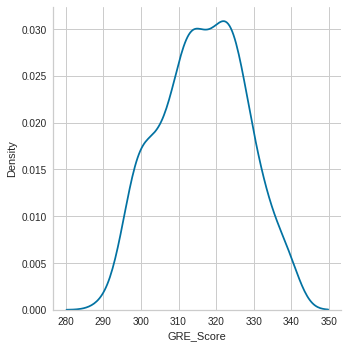

In [15]:
_=sns.displot(
              data =df,
              x = 'GRE_Score',
              kind = 'kde'
             )    # Distribution plot. Almost symmetric

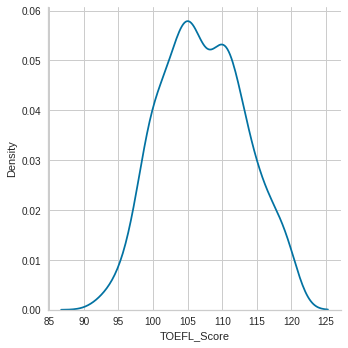

In [16]:
_=sns.displot(
               data =df,
               x = 'TOEFL_Score',
               kind = 'kde'      # Almost symmetric
             )                

### Bivariate distributions & Relationships

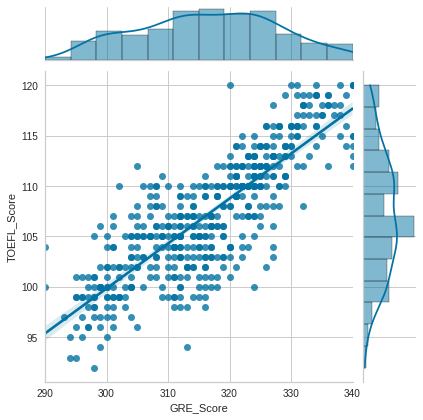

In [23]:
_=sns.jointplot(
                data = df,
                x='GRE_Score',
                y='TOEFL_Score',
                kind = 'reg'        # Strong correlation
               )

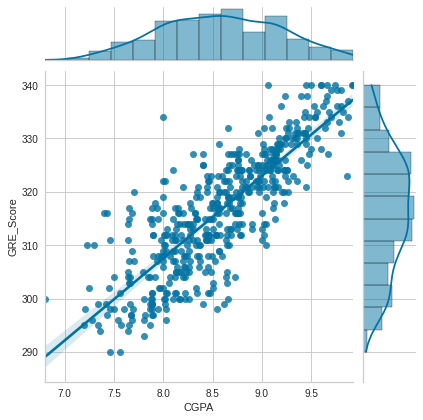

In [24]:
_= sns.jointplot(
                  data = df,
                  x='CGPA',
                  y='GRE_Score',
                  kind = 'reg'       # Strong correlation (0.83)
                 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


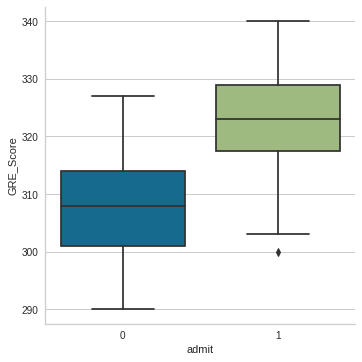

In [25]:
_=sns.catplot(
              'admit',
              'GRE_Score',
               data = df,
               kind = 'box'
              )      # Relationship of 'admit' to GRE_SCore

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


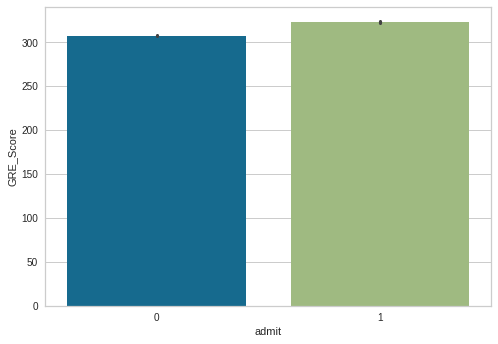

In [26]:
_=sns.barplot(
               'admit',
               'GRE_Score',
               estimator = np.mean,
               data = df
              ) # Avg GRE score of admit vs non-admit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


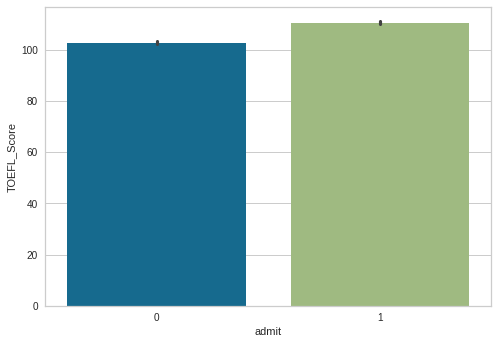

In [27]:
_=sns.barplot(
              'admit',
              'TOEFL_Score',
              estimator = np.mean,
              data = df
              )

### Structure in data?

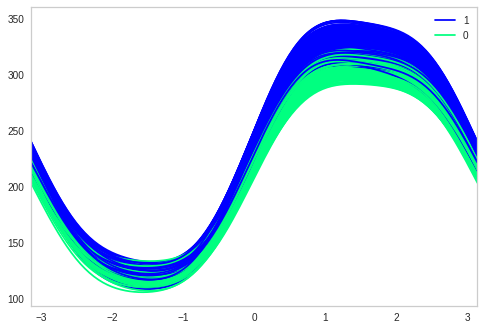

In [22]:
# Andrews plot
_=pd.plotting.andrews_curves(
                              df,
                              'admit',
                              colormap = 'winter'       # Is there any pattern in the data?
                             )


## Clustering

In [28]:
# 3.1 Copy 'admit' column to another variable and then drop it
#     We will not use it in clustering
y = df['admit'].values
df.drop(columns = ['admit'], inplace = True)


In [29]:
# 3.2 Scale data using StandardScaler
ss = StandardScaler()     # Create an instance of class
ss.fit(df)                # Train object on the data
X = ss.transform(df)      # Transform data
X[:5, :]                  # See first 5 rows



StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 1.819,  1.779,  0.776,  1.137,  1.099,  1.777,  0.886],
       [ 0.667, -0.032,  0.776,  0.632,  1.099,  0.486,  0.886],
       [-0.042, -0.525, -0.1  , -0.378,  0.017, -0.954,  0.886],
       [ 0.49 ,  0.462, -0.1  ,  0.127, -1.064,  0.155,  0.886],
       [-0.219, -0.69 , -0.975, -1.388, -0.524, -0.606, -1.128]])

In [30]:
# 4.0 Split dataset into train/test
X_train, X_test, _, y_test = train_test_split( X,               # np array without target
                                               y,               # Target
                                               test_size = 0.25 # test_size proportion
                                               )


In [31]:
# 4.1 Examine the results
X_train.shape              # (375, 7)
X_test.shape               # (125, 7)


(375, 7)

(125, 7)

In [32]:
# 5.0 Develop model
# 5.1 Create an instance of modeling class
#     We will have two clusters
"""
Uses kmeans++ initialization
Ref: https://www.geeksforgeeks.org/ml-k-means-algorithm/
kmeans++ steps for initialization involved are:

        1) Randomly select the first centroid from the data points.
        2) For each data point compute its distance from the nearest,
           previously choosen centroid.
        3) Select the next centroid from the data points such that the
           probability of choosing a point as centroid is directly 
           proportional to its distance from the nearest, previously
           chosen centroid. (i.e. the point having maximum distance
           from the nearest centroid is most likely to be selected 
           next as a centroid)
        4) Repeat steps 2 and 3 untill k centroids have been sampled

Kmeans algorith used is 'elkan' which is a modification of Lloyd's
algorithm. (https://en.wikipedia.org/wiki/Lloyd%27s_algorithm)
For Vornoi diagram, please see:
http://cs.brown.edu/courses/cs252/misc/resources/lectures/pdf/notes09.pdf    

"""

"\nUses kmeans++ initialization\nRef: https://www.geeksforgeeks.org/ml-k-means-algorithm/\nkmeans++ steps for initialization involved are:\n\n        1) Randomly select the first centroid from the data points.\n        2) For each data point compute its distance from the nearest,\n           previously choosen centroid.\n        3) Select the next centroid from the data points such that the\n           probability of choosing a point as centroid is directly \n           proportional to its distance from the nearest, previously\n           chosen centroid. (i.e. the point having maximum distance\n           from the nearest centroid is most likely to be selected \n           next as a centroid)\n        4) Repeat steps 2 and 3 untill k centroids have been sampled\n\nKmeans algorith used is 'elkan' which is a modification of Lloyd's\nalgorithm. (https://en.wikipedia.org/wiki/Lloyd%27s_algorithm)\nFor Vornoi diagram, please see:\nhttp://cs.brown.edu/courses/cs252/misc/resources/lectures/p

In [33]:
# 5.11
clf = KMeans(n_clusters = 2)

In [34]:
# 5.2 Train the object over data
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Evaluating clusters

In [ ]:
# 5.3 So what are our clusters?
clf.cluster_centers_
clf.cluster_centers_.shape         # (2, 7)
clf.labels_                        # Cluster labels for every observation
clf.labels_.size                   # 375

# Sum of squared distance to respective centriods, SSE
clf.inertia_   

In [36]:
# 5.4 For importance and interpretaion of silhoutte score, see:
# See Stackoverflow:  https://stats.stackexchange.com/q/10540
silhouette_score(X_train, clf.labels_)    # 0.20532663345078295


0.3862622296170689

### Making predictions

In [37]:
# 6 Make prediction over our test data and check accuracy
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

In [38]:
# 6.1 How good is prediction
np.sum(y_pred == y_test)/y_test.size

0.224

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


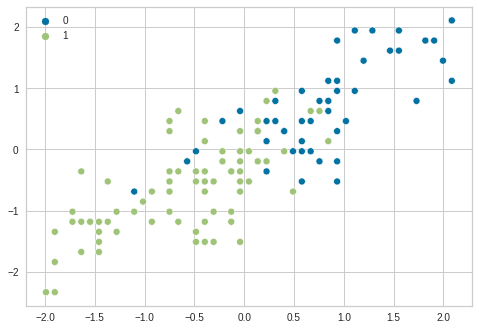

In [39]:
# 7.0 Are clusters distiguisable?
#     We plot 1st and 2nd columns of X
#     Each point is coloured as per the
#     cluster to which it is assigned (y_pred)
dx = pd.Series(X_test[:, 0])
dy = pd.Series(X_test[:,1])
_ = sns.scatterplot(dx,dy, hue = y_pred)

### Scree plot

In [40]:
# 7.1 Scree plot:
sse = []
for i,j in enumerate(range(10)):
    # 7.1.1 How many clusters?
    n_clusters = i+1
    # 7.1.2 Create an instance of class
    clf1 = KMeans(n_clusters = n_clusters)
    # 7.1.3 Train the kmeans object over data
    _=clf1.fit(X_train)
    # 7.1.4 Store the value of inertia in sse
    sse.append(clf1.inertia_ )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


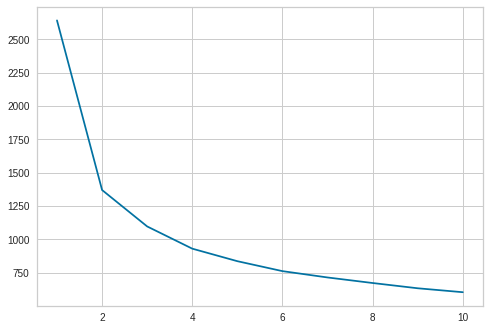

In [41]:
# 7.2 Plot the line now
_=sns.lineplot(range(1, 11), sse)

#### Silhoutte Plot
Reference [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
sample_silhouette_values = silhouette_samples(X_train, clf.labels_)

In [ ]:
sample_silhouette_values

In [ ]:
ss_1 = sample_silhouette_values[clf.labels_ == 1]
ss_1.sort()

In [ ]:
size_cluster_1 = ss_1.shape[0]

In [ ]:
y_lower = 10
y_upper = y_lower + size_cluster_1

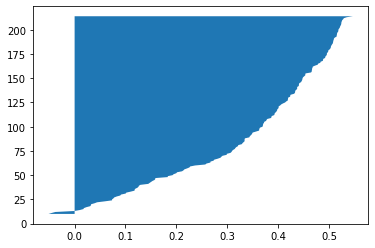

In [ ]:
fig = plt.figure()
plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ss_1)

In [ ]:
############# I am done #######################3